<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>April 20, 2018: cleanup, `sin` and `cos` $g$ poly
<br>November 16 and 18, 2016: `expt` and `log` $g$ poly
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to Catalan array $\mathcal{C}$.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, alpha

from commons import *
from matrix_functions import *
from sequences import *
import functions_catalog

init_printing()

# Catalan array $\mathcal{C}$

In [2]:
m=8

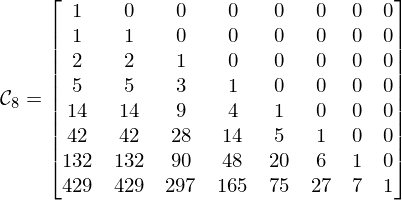

In [3]:
C = define(let=Symbol(r'\mathcal{{C}}_{{ {} }}'.format(m)), 
           be=Matrix(m, m, lambda n,k: (k+1)*binomial(2*n-k, n-k)/(n+1) if n > 0 else int(not k)))
C

In [4]:
eigendata = spectrum(C)
eigendata

In [5]:
data, eigenvals, multiplicities = eigendata.rhs

In [6]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

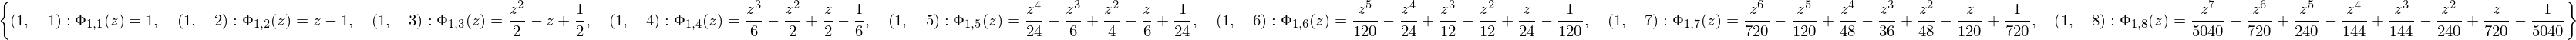

In [7]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

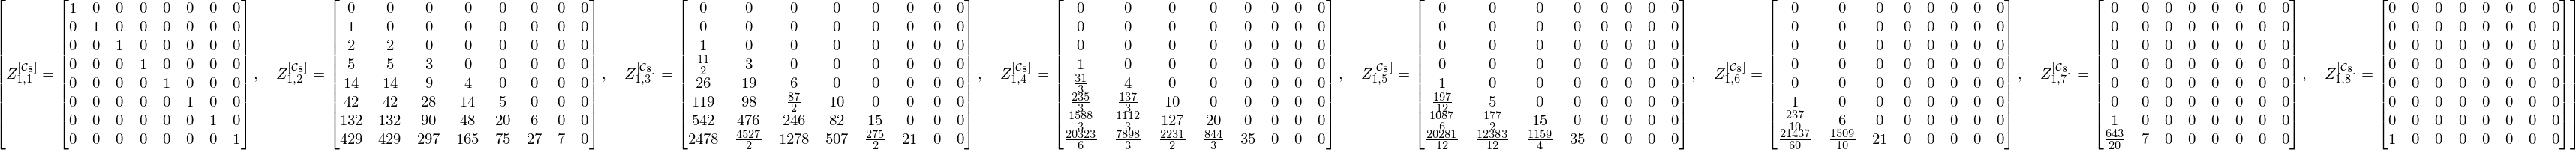

In [8]:
cmatrices = component_matrices(C, Phi_polynomials)
list(cmatrices.values())

## `power` function

In [9]:
f_power, g_power, G_power = functions_catalog.power(eigendata, Phi_polynomials)

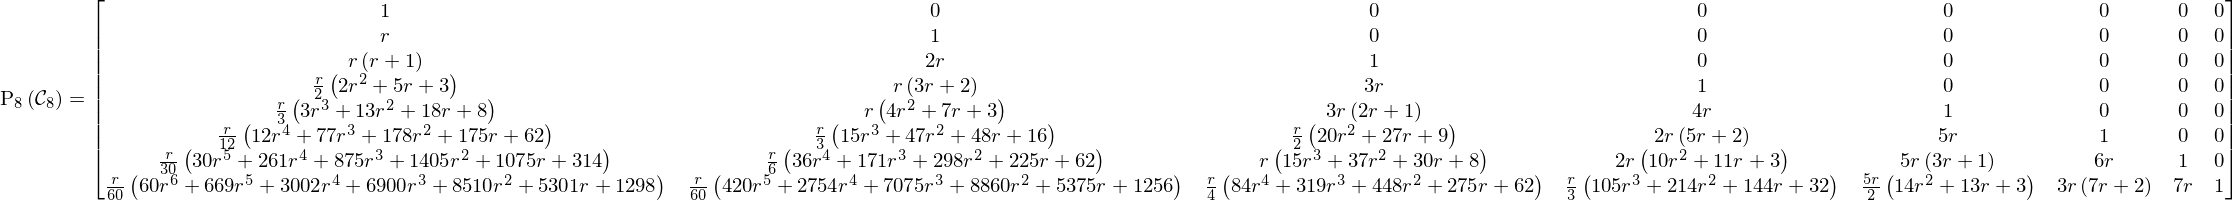

In [13]:
C_power = G_power(C)
C_power

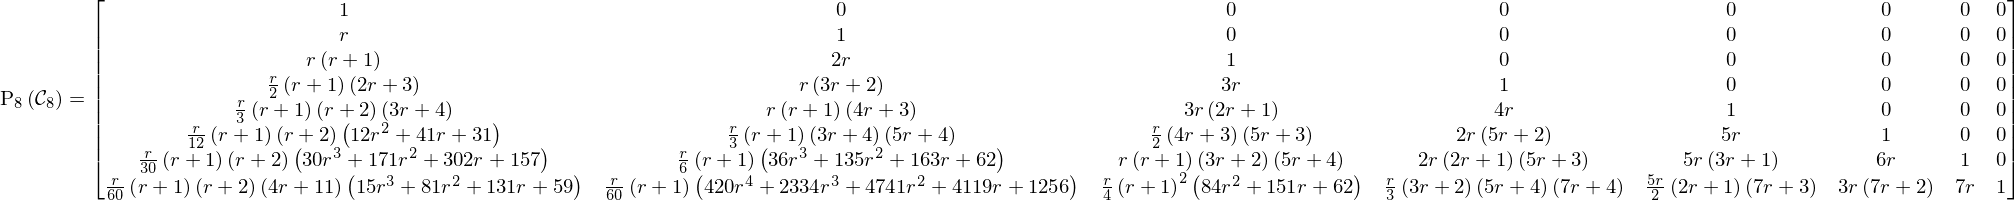

In [15]:
define(C_power.lhs, C_power.rhs.applyfunc(factor)) # factored

In [16]:
assert C_power.rhs == (C.rhs**r).applyfunc(simplify)

In [17]:
inspect(C_power.rhs)

nature(is_ordinary=True, is_exponential=False)

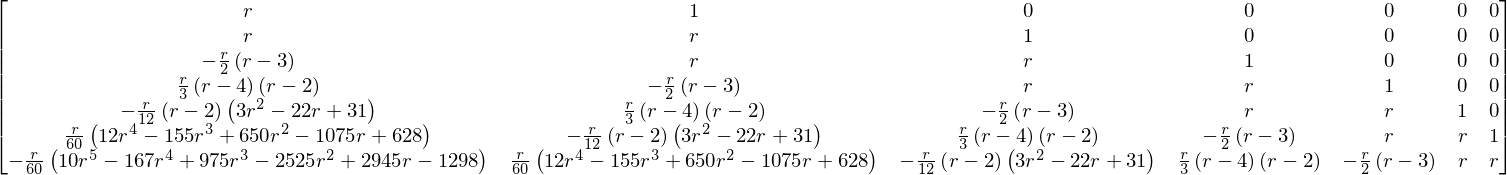

In [18]:
production_matrix(C_power.rhs).applyfunc(factor)

## `inverse` function

In [19]:
f_inverse, g_inverse, G_inverse = functions_catalog.inverse(eigendata, Phi_polynomials)

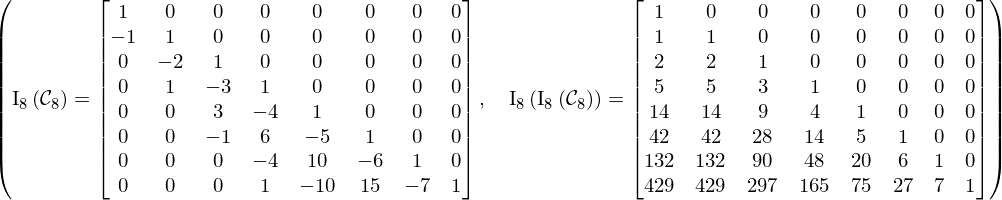

In [20]:
C_inverse = G_inverse(C)
C_inverse, G_inverse(C_inverse)

In [21]:
inspect(C_inverse.rhs)

nature(is_ordinary=True, is_exponential=False)

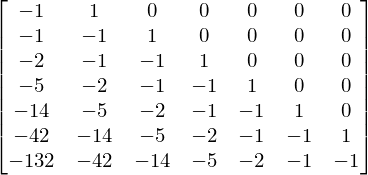

In [22]:
production_matrix(C_inverse.rhs)

In [23]:
assert C_inverse.rhs*C.rhs == Matrix(m, m, identity_matrix())
assert C_inverse.rhs == C_power.rhs.subs({r:-1})

## `sqrt` function

In [24]:
f_sqrt, g_sqrt, G_sqrt = functions_catalog.square_root(eigendata, Phi_polynomials)

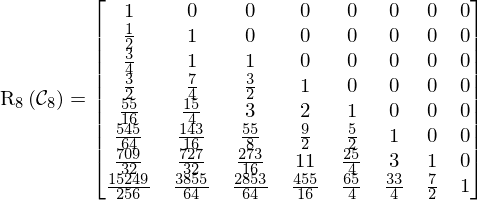

In [25]:
C_sqrt = G_sqrt(C)
C_sqrt

In [26]:
inspect(C_sqrt.rhs)

nature(is_ordinary=True, is_exponential=False)

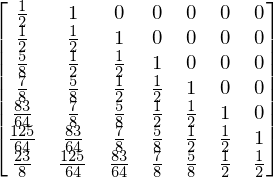

In [27]:
production_matrix(C_sqrt.rhs)

In [28]:
assert C.rhs**(S(1)/2) == C_sqrt.rhs
assert C_sqrt.rhs == C_power.rhs.subs({r:S(1)/2})

## `expt` function

In [29]:
f_exp, g_exp, G_exp = functions_catalog.exp(eigendata, Phi_polynomials)

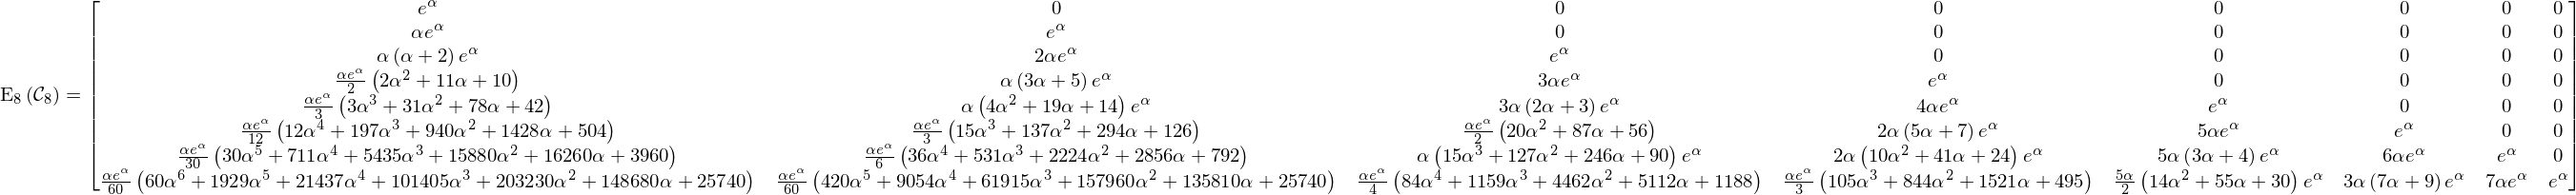

In [30]:
C_exp = G_exp(C)
C_exp

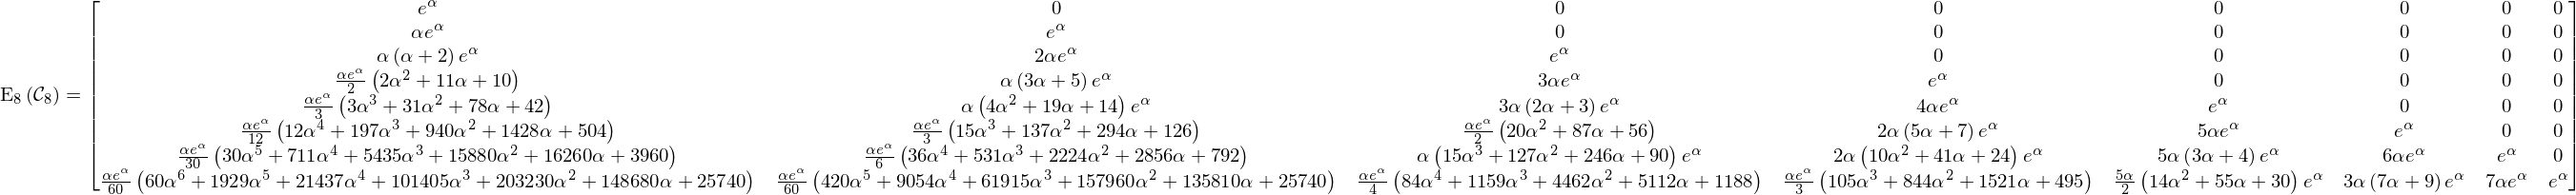

In [35]:
define(C_exp.lhs, C_exp.rhs.applyfunc(factor))

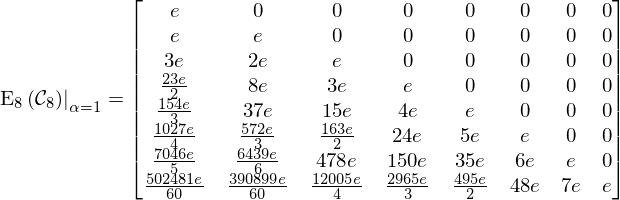

In [37]:
C_exp1 = define(let=Subs(C_exp.lhs, alpha, 1), be=C_exp.rhs.subs({alpha:1}))
C_exp1

In [38]:
inspect(C_exp.rhs)

nature(is_ordinary=False, is_exponential=False)

In [58]:
inspect(C_exp1.rhs)

nature(is_ordinary=False, is_exponential=False)

In [42]:
eigendata_Cexpt = spectrum(C_exp1)
eigendata_Cexpt

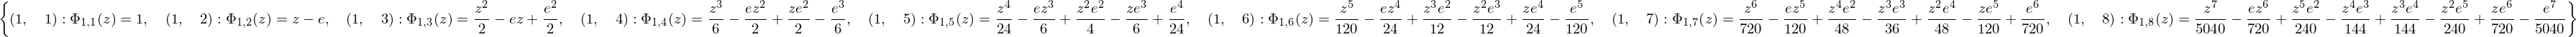

In [43]:
Phi_polynomials_Cexpt = component_polynomials(eigendata_Cexpt, early_eigenvals_subs=True)
Phi_polynomials_Cexpt

## `log` function

In [44]:
f_log, g_log, G_log = functions_catalog.log(eigendata, Phi_polynomials)

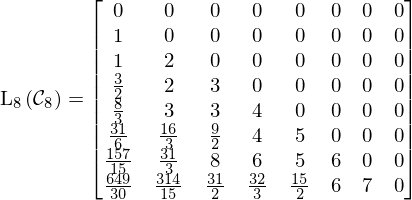

In [45]:
C_log = G_log(C)
C_log

In [46]:
inspect(C_log.rhs[1:,:-1])

nature(is_ordinary=False, is_exponential=True)

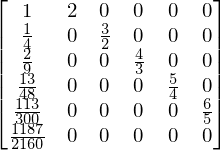

In [48]:
production_matrix(C_log.rhs[1:,:-1])

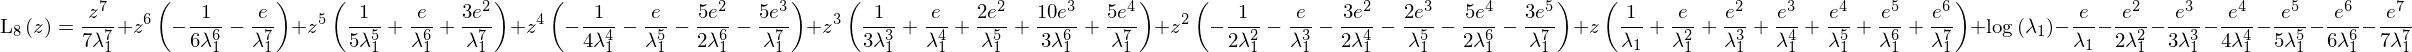

In [49]:
g_log_Cexpt = Hermite_interpolation_polynomial(f_log, eigendata_Cexpt, Phi_polynomials_Cexpt)
g_log_Cexpt

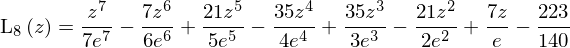

In [50]:
g_log_Cexpt = g_log_Cexpt.subs(eigendata_Cexpt.rhs[1])
g_log_Cexpt

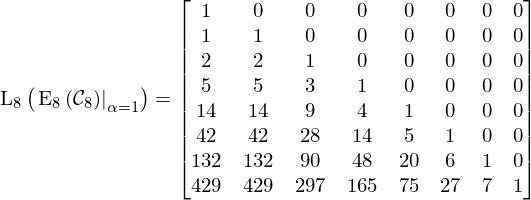

In [52]:
with lift_to_matrix_function(g_log_Cexpt) as G_log_Cexpt:
    CC = G_log_Cexpt(C_exp1)
CC

## `sin` function

In [53]:
f_sin, g_sin, G_sin = functions_catalog.sin(eigendata, Phi_polynomials)

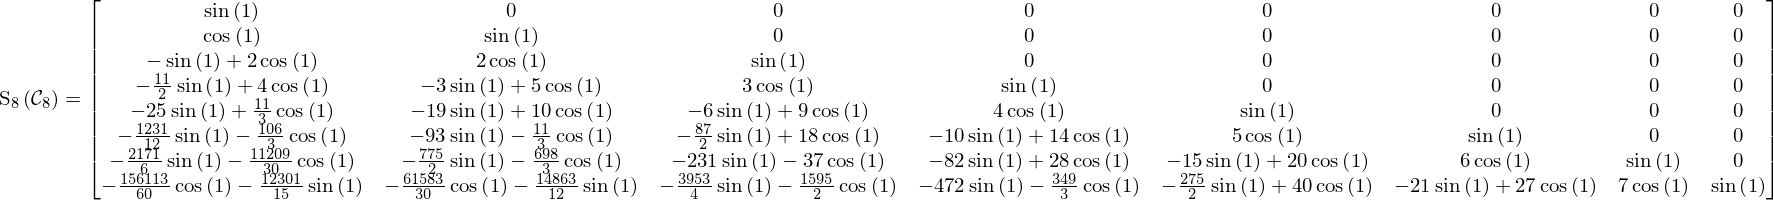

In [54]:
C_sin = G_sin(C)    
C_sin

In [ ]:
inspect(C_sin.rhs) # takes long to evaluate

## `cos` function

In [55]:
f_cos, g_cos, G_cos = functions_catalog.cos(eigendata, Phi_polynomials)

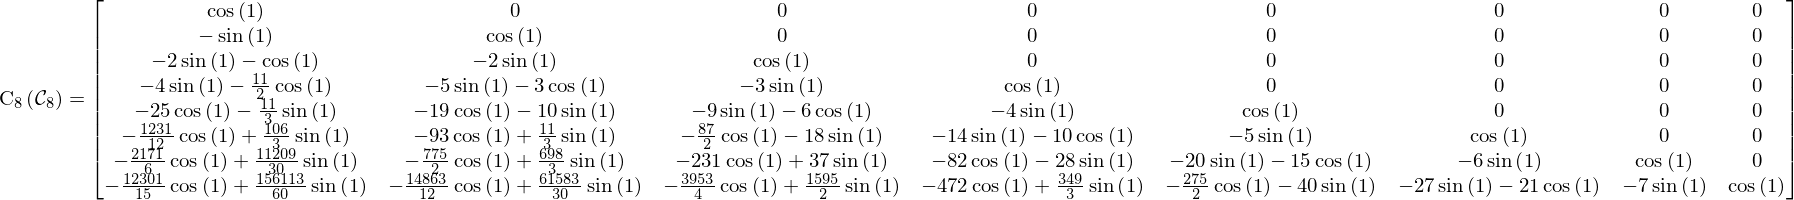

In [56]:
C_cos = G_cos(C)    
C_cos

In [ ]:
inspect(C_sin.rhs) # takes long to evaluate

In [57]:
assert (C_sin.rhs**2 + C_cos.rhs**2).applyfunc(trigsimp) == Matrix(m,m, identity_matrix())

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.